# King County House Sales Project

* Student Name: GORRETI MUTHONI
* Student pace: FULL TIME

## Business Understanding

A real estate agency has given us a task to analyze house prices based on various features of the house. They want to know what kind of advice to give to homeowners when they want to buy or sell homes. They also need to know what features of a house a homeowner should focus on so as to increase the selling price of their homes.

In this project, I will use Linear Regression Modelling to get inferences on the sale price of the homes based on their features.

I'll use the King County House dataset so as to know what features of a house will increase the sale price of the houses. The insights from this project will be used to give advice to homeowners who want to buy or sell homes.

## Data Understanding
For this project I will use the ```kc_house_data.csv``` data to predict the sales of houses. The following is the information on the columns in the dataset;

* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
* `view` - Quality of view from house
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
* `grade` - Overall grade of the house. Related to the construction and design of the house.
* `sqft_above` - Square footage of house apart from basement
* `sqft_basement` - Square footage of the basement
* `yr_built` - Year when house was built
* `yr_renovated` - Year when house was renovated
* `zipcode` - ZIP Code used by the United States Postal Service
* `lat` - Latitude coordinate
* `long` - Longitude coordinate
* `sqft_living15` - The square footage of interior housing living space for the nearest 15 neighbors
* `sqft_lot15` - The square footage of the land lots of the nearest 15 neighbors

### Importing Libraries

In [55]:
# for loading and manipulation of data
import pandas as pd

import numpy as np

# for visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")

# for linear regression modelling
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

from statsmodels.stats.diagnostic import linear_rainbow
from statsmodels.stats.diagnostic import het_goldfeldquandt

### Loading Dataset

In [56]:
data = pd.read_csv("kc_house_data.csv")

### Data Understanding

In [57]:
# preview of the first 5 rows
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [58]:
# preview of the last 5 rows
data.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,NO,NONE,...,7 Average,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


In [59]:
# number of rows and columns
data.shape

(21597, 21)

In [60]:
# statistical summary of data
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [61]:
# Information on the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

From above, this dataset consists of the following;
* There are 21597 rows and 21 columns
* There are 9 columns of type ```int64```, 6 columns of type ```string``` and 6 columns of type ```float64```.
* The following columns have null values;
    * waterfront
    * view
    * yr_renovated

### Data Cleaning

Our dataset has a total of 21 columns. For this project, I will not be using all the columns. The following are the columns I will not be using;

         date
         view
         sqft_above
         sqft_basement
         yr_renovated
         zipcode
         lat
         long
         sqft_living15
         sqft_lot15

In [62]:
# dropping columns that i'll not be using
data = data.drop(data[["date", "view", "sqft_above", "sqft_basement", "yr_renovated", "zipcode", "lat", "long",
"sqft_living15", "sqft_lot15"]], axis = 1)
data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,Average,7 Average,1955
1,6414100192,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1987


In [63]:
# information on new data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21597 non-null  int64  
 1   price        21597 non-null  float64
 2   bedrooms     21597 non-null  int64  
 3   bathrooms    21597 non-null  float64
 4   sqft_living  21597 non-null  int64  
 5   sqft_lot     21597 non-null  int64  
 6   floors       21597 non-null  float64
 7   waterfront   19221 non-null  object 
 8   condition    21597 non-null  object 
 9   grade        21597 non-null  object 
 10  yr_built     21597 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 1.8+ MB


Our new dataset now has a total of 11 columns. 3 columns are of type ```float64```, 5 columns of type ```int64``` and 3 columns of type ```string```.

The column ```waterfront``` has null values because it has a non-null count of ```19221``` instead of ```21597```.

In [64]:
# number of rows with null values
data.isna().sum()

id                0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront     2376
condition         0
grade             0
yr_built          0
dtype: int64

The waterfront column has a total of 2376 rows which have null values.

In [65]:
# sample rows where waterfront has no missing values
data[data["waterfront"].notna()].sample(5, random_state = 1)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
1551,984220240,299000.0,4,2.50,1820,7575,1.0,NO,Average,7 Average,1975
9501,1402000210,390000.0,3,2.25,2420,31497,1.0,NO,Good,8 Good,1964
12974,6632300477,324950.0,3,1.00,1040,7288,1.0,NO,Average,7 Average,1959
14409,8137500730,500000.0,3,2.50,1940,37565,1.0,NO,Good,8 Good,1987
8630,259000100,430000.0,3,1.75,1610,7900,1.0,NO,Good,8 Good,1960


In [66]:
# sample rows where waterfront has missing values
data[data["waterfront"].isna()].sample(5, random_state = 1)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
16195,4450700010,375000.0,3,1.75,1660,9673,1.0,NaN,Average,7 Average,1976
2510,2126079046,390000.0,3,1.75,1220,216332,1.0,NaN,Average,7 Average,1981
10389,1072000260,399000.0,3,1.75,1780,11440,1.0,NaN,Average,8 Good,1977
14597,2423069170,770000.0,3,2.50,2430,54059,2.0,NaN,Average,10 Very Good,1987
2638,4045800030,739000.0,3,2.25,2220,10530,1.0,NaN,Good,8 Good,1974


In [67]:
# drop rows with missing values
data.dropna(subset = ["waterfront"], inplace = True)

In [68]:
# confirming there are no null values
data.isna().sum()

id             0
price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
waterfront     0
condition      0
grade          0
yr_built       0
dtype: int64

In [69]:
# information on data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19221 entries, 1 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           19221 non-null  int64  
 1   price        19221 non-null  float64
 2   bedrooms     19221 non-null  int64  
 3   bathrooms    19221 non-null  float64
 4   sqft_living  19221 non-null  int64  
 5   sqft_lot     19221 non-null  int64  
 6   floors       19221 non-null  float64
 7   waterfront   19221 non-null  object 
 8   condition    19221 non-null  object 
 9   grade        19221 non-null  object 
 10  yr_built     19221 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 1.8+ MB


In [70]:
# checking for duplicates
data.duplicated().sum()

2

In [71]:
# extracting duplicated rows
data.loc[data.duplicated(), :]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
14969,6308000010,585000.0,3,2.5,2290,5089,2.0,NO,Average,9 Better,2001
20038,8648900110,555000.0,3,2.5,1940,3211,2.0,NO,Average,8 Good,2009


In [72]:
# drop the duplicates
data.drop_duplicates(inplace = True)

In [73]:
# confirming there are duplicates
data.duplicated().sum()

0

In [74]:
# Information on data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19219 entries, 1 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           19219 non-null  int64  
 1   price        19219 non-null  float64
 2   bedrooms     19219 non-null  int64  
 3   bathrooms    19219 non-null  float64
 4   sqft_living  19219 non-null  int64  
 5   sqft_lot     19219 non-null  int64  
 6   floors       19219 non-null  float64
 7   waterfront   19219 non-null  object 
 8   condition    19219 non-null  object 
 9   grade        19219 non-null  object 
 10  yr_built     19219 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 1.8+ MB


The columns ```sqft_living``` and ```sqft_lot``` will be expresses into metric units. We'll convert the columns from square feet to square meters.

In [75]:
# sqft_living
data["sqft_living"] = data["sqft_living"] * 0.092903
data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
1,6414100192,538000.0,3,2.25,238.76071,7242,2.0,NO,Average,7 Average,1951
2,5631500400,180000.0,2,1.00,71.53531,10000,1.0,NO,Average,6 Low Average,1933
3,2487200875,604000.0,4,3.00,182.08988,5000,1.0,NO,Very Good,7 Average,1965
4,1954400510,510000.0,3,2.00,156.07704,8080,1.0,NO,Average,8 Good,1987
5,7237550310,1230000.0,4,4.50,503.53426,101930,1.0,NO,Average,11 Excellent,2001


In [76]:
# sqft_lot
data["sqft_lot"] = data["sqft_lot"] *  0.092903
data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
1,6414100192,538000.0,3,2.25,238.76071,672.803526,2.0,NO,Average,7 Average,1951
2,5631500400,180000.0,2,1.00,71.53531,929.030000,1.0,NO,Average,6 Low Average,1933
3,2487200875,604000.0,4,3.00,182.08988,464.515000,1.0,NO,Very Good,7 Average,1965
4,1954400510,510000.0,3,2.00,156.07704,750.656240,1.0,NO,Average,8 Good,1987
5,7237550310,1230000.0,4,4.50,503.53426,9469.602790,1.0,NO,Average,11 Excellent,2001


Now the columns sqft_living and sqft_lot are in square meters which more people are familiar with as compared to square feet.

### Investigating the columns

In [77]:
# preview of dataset again
data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
1,6414100192,538000.0,3,2.25,238.76071,672.803526,2.0,NO,Average,7 Average,1951
2,5631500400,180000.0,2,1.00,71.53531,929.030000,1.0,NO,Average,6 Low Average,1933
3,2487200875,604000.0,4,3.00,182.08988,464.515000,1.0,NO,Very Good,7 Average,1965
4,1954400510,510000.0,3,2.00,156.07704,750.656240,1.0,NO,Average,8 Good,1987
5,7237550310,1230000.0,4,4.50,503.53426,9469.602790,1.0,NO,Average,11 Excellent,2001


In [78]:
# waterfront
data["waterfront"].value_counts()

NO     19073
YES      146
Name: waterfront, dtype: int64

Houses that are not on a waterfront seem to be the most common compared to those on a waterfront

In [79]:
# condition
data["condition"].value_counts()

Average      12472
Good          5058
Very Good     1512
Fair           152
Poor            25
Name: condition, dtype: int64

Houses whose conditions are average seem to be the most common

In [80]:
# grade
data["grade"].value_counts()

7 Average        7974
8 Good           5408
9 Better         2319
6 Low Average    1810
10 Very Good     1018
11 Excellent      357
5 Fair            212
12 Luxury          82
4 Low              25
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

Houses whose grade is Average seem to be the most common which is expected because earlier we saw that the houses whose conditions are average are common.

In [81]:
# year built
years = sorted(data["yr_built"].unique())
print(years)

[1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]


In [82]:
data["yr_built"].value_counts()

2014    496
2006    404
2005    395
2007    372
2003    372
       ... 
1901     27
1933     26
1902     24
1935     22
1934     19
Name: yr_built, Length: 116, dtype: int64

The houses available are those built from the year 1900 to 2015.

Houses built in the 2000s seem to be common. The most common ones are those built in the year 2014.

In [83]:
#bedrooms
data["bedrooms"].value_counts()

3     8719
4     6149
2     2451
5     1441
6      227
1      175
7       35
8       11
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

Seems like most people prefer houses with 3 to 5 bedrooms.

In [84]:
#bathrooms
data["bathrooms"].unique()

array([2.25, 1.  , 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 1.25, 5.25, 6.  , 0.5 , 5.5 ,
       6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

In [85]:
data["bathrooms"].value_counts()

2.50    4837
1.00    3411
1.75    2725
2.25    1788
2.00    1722
1.50    1283
2.75    1038
3.00     662
3.50     656
3.25     521
3.75     136
4.00     121
4.50      91
4.25      73
0.75      65
4.75      22
5.00      17
5.25      11
5.50      10
1.25       8
6.00       6
0.50       4
5.75       3
8.00       2
6.25       2
6.75       2
7.75       1
6.50       1
7.50       1
Name: bathrooms, dtype: int64

After researching, I found out that a bathroom with a sink, toilet, shower but no tub is a 3/4. So based on this, a bathroom that is a 1 is a bathroom with a sink, toilet shower and a tub. Each of these items count as a .25 convention therefore a bathroom that misses 1 means it is a fraction bathroom.

For a better understanding on bathrooms, you can visit this site [bathrooms](https://rosskaplan.com/2018/02/the-case-for-the-1-25-bath-or-the-1-375-bath/#:~:text=At%20least%2C%20that's%20what%20Realtors,is%20a%203%2F4%20Bath.).

In [86]:
#sqft_living
data["sqft_living"].value_counts()

120.773900    125
133.780320    121
130.064200    120
169.083460    118
154.218980    113
             ... 
129.320976      1
175.958282      1
225.940096      1
254.925832      1
707.920860      1
Name: sqft_living, Length: 992, dtype: int64

```sqft_living``` is the square footage of living space in the home. 

In [87]:
# sqft_lot
data["sqft_lot"].value_counts()

464.515000      329
557.418000      253
371.612000      222
668.901600      186
445.934400      112
               ... 
45850.789202      1
290.507681        1
3627.769247       1
2932.947710       1
3336.332536       1
Name: sqft_lot, Length: 9070, dtype: int64

```sqft_lot``` is the square footage of the lot.

In [88]:
# floors
data["floors"].value_counts()

1.0    9493
2.0    7348
1.5    1681
3.0     546
2.5     145
3.5       6
Name: floors, dtype: int64

Houses with between 1 and 2 floors seem to be more common.

## Preparation of Data for Modelling

In order to model the data, I'll separate the data into two i.e. X and y. X will consist of all the independent variables and y will consist of the target variable which is ```price```.

In [89]:
# separating data
y = data["price"]
X = data[["bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors", "waterfront", "condition", "grade", "yr_built"]]

In [90]:
#preview of y
y.head()

1     538000.0
2     180000.0
3     604000.0
4     510000.0
5    1230000.0
Name: price, dtype: float64

In [91]:
# change y to a pandas dataframe
y = pd.DataFrame(y)
y.head()

,price
1,538000.0
2,180000.0
3,604000.0
4,510000.0
5,1230000.0


In [92]:
# preview of X
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
1,3,2.25,238.76071,672.803526,2.0,NO,Average,7 Average,1951
2,2,1.00,71.53531,929.030000,1.0,NO,Average,6 Low Average,1933
3,4,3.00,182.08988,464.515000,1.0,NO,Very Good,7 Average,1965
4,3,2.00,156.07704,750.656240,1.0,NO,Average,8 Good,1987
5,4,4.50,503.53426,9469.602790,1.0,NO,Average,11 Excellent,2001


There are three categorical columns namely ```waterfront, condition, and grade```. These columns need to be changed to a numerical datatype for modelling.

In [93]:
#waterfront
X["waterfront"].value_counts()

NO     19073
YES      146
Name: waterfront, dtype: int64

For the waterfront column, we'll use one-hot encoding to generate binary numbers. We will then drop the "YES" column which will act as a point of reference.

In [94]:
# convert yes and no into binary
X = pd.get_dummies(X, columns = ["waterfront"])
X = X.drop("waterfront_YES", axis = 1)
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,waterfront_NO
1,3,2.25,238.76071,672.803526,2.0,Average,7 Average,1951,1
2,2,1.00,71.53531,929.030000,1.0,Average,6 Low Average,1933,1
3,4,3.00,182.08988,464.515000,1.0,Very Good,7 Average,1965,1
4,3,2.00,156.07704,750.656240,1.0,Average,8 Good,1987,1
5,4,4.50,503.53426,9469.602790,1.0,Average,11 Excellent,2001,1
...,...,...,...,...,...,...,...,...,...
21591,3,2.50,121.70293,120.216482,2.0,Average,8 Good,2008,1
21592,3,2.50,142.14159,105.073293,3.0,Average,8 Good,2009,1
21593,4,2.50,214.60593,540.045139,2.0,Average,8 Good,2014,1
21594,2,0.75,94.76106,125.419050,2.0,Average,7 Average,2009,1


For the condition column, we'll do the same but this time the Average column will act as a point of reference.

In [95]:
# condition
X["condition"].value_counts()

Average      12472
Good          5058
Very Good     1512
Fair           152
Poor            25
Name: condition, dtype: int64

In [96]:
#converting the condition column
X = pd.get_dummies(X, columns = ["condition"])
X = X.drop("condition_Average", axis = 1)
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,yr_built,waterfront_NO,condition_Fair,condition_Good,condition_Poor,condition_Very Good
1,3,2.25,238.76071,672.803526,2.0,7 Average,1951,1,0,0,0,0
2,2,1.00,71.53531,929.030000,1.0,6 Low Average,1933,1,0,0,0,0
3,4,3.00,182.08988,464.515000,1.0,7 Average,1965,1,0,0,0,1
4,3,2.00,156.07704,750.656240,1.0,8 Good,1987,1,0,0,0,0
5,4,4.50,503.53426,9469.602790,1.0,11 Excellent,2001,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
21591,3,2.50,121.70293,120.216482,2.0,8 Good,2008,1,0,0,0,0
21592,3,2.50,142.14159,105.073293,3.0,8 Good,2009,1,0,0,0,0
21593,4,2.50,214.60593,540.045139,2.0,8 Good,2014,1,0,0,0,0
21594,2,0.75,94.76106,125.419050,2.0,7 Average,2009,1,0,0,0,0


In [97]:
# grade
X["grade"].value_counts()

7 Average        7974
8 Good           5408
9 Better         2319
6 Low Average    1810
10 Very Good     1018
11 Excellent      357
5 Fair            212
12 Luxury          82
4 Low              25
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

We'll also do the same for the grade column and drop the Average category which will act as a point of reference.

In [98]:
#converting the grade column
X = pd.get_dummies(X, columns = ["grade"])
X = X.drop("grade_7 Average", axis = 1)
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,waterfront_NO,condition_Fair,condition_Good,condition_Poor,...,grade_10 Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_8 Good,grade_9 Better
1,3,2.25,238.76071,672.803526,2.0,1951,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1.00,71.53531,929.030000,1.0,1933,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,3.00,182.08988,464.515000,1.0,1965,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,2.00,156.07704,750.656240,1.0,1987,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,4,4.50,503.53426,9469.602790,1.0,2001,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,3,2.50,121.70293,120.216482,2.0,2008,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
21592,3,2.50,142.14159,105.073293,3.0,2009,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
21593,4,2.50,214.60593,540.045139,2.0,2014,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
21594,2,0.75,94.76106,125.419050,2.0,2009,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### First Model: Building our Baseline Model

For the baseline model, we'll use an independent variable that has the highest correlation with the target variable. We'll use this model for reference to see if our other models perform better compared to the baseline model.

In [99]:
# first join the X and y dataframe to view the correlation
data = pd.concat([y, X], axis = 1)

data.corr()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,waterfront_NO,condition_Fair,condition_Good,...,grade_10 Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_8 Good,grade_9 Better
price,1.000000,0.309657,0.527353,0.704653,0.087007,0.258281,0.053520,-0.276296,-0.050131,-0.031805,...,0.341468,0.348998,0.300244,0.221488,-0.005419,-0.031783,-0.082595,-0.207732,0.000390,0.234314
bedrooms,0.309657,1.000000,0.516220,0.578219,0.029396,0.182445,0.157573,0.002390,-0.049945,-0.011725,...,0.135747,0.116718,0.065575,0.041228,-0.018448,-0.067422,-0.115042,-0.240232,0.073861,0.162930
bathrooms,0.527353,0.516220,1.000000,0.756350,0.085109,0.506195,0.506996,-0.067288,-0.074640,-0.169034,...,0.273528,0.247602,0.163791,0.100713,-0.012813,-0.056135,-0.138080,-0.366454,0.187691,0.262380
sqft_living,0.704653,0.578219,0.756350,1.000000,0.173346,0.357198,0.317465,-0.110230,-0.061307,-0.083917,...,0.369522,0.345149,0.244018,0.152301,-0.012216,-0.054251,-0.126332,-0.312613,0.069535,0.315252
sqft_lot,0.087007,0.029396,0.085109,0.173346,1.000000,-0.007220,0.055909,-0.023141,0.044969,0.013641,...,0.079399,0.071213,0.064630,0.008369,-0.000370,0.000975,0.019300,-0.017840,-0.024559,0.046894
floors,0.258281,0.182445,0.506195,0.357198,-0.007220,1.000000,0.490196,-0.021893,-0.054632,-0.258479,...,0.175528,0.117571,0.056030,0.022472,-0.006610,-0.030400,-0.079718,-0.230838,0.199364,0.242985
yr_built,0.053520,0.157573,0.506996,0.317465,0.055909,0.490196,1.000000,0.026070,-0.063902,-0.259120,...,0.149004,0.098731,0.046376,0.004940,-0.012529,-0.043033,-0.127913,-0.314893,0.202834,0.215761
waterfront_NO,-0.276296,0.002390,-0.067288,-0.110230,-0.023141,-0.021893,0.026070,1.000000,0.001047,-0.010310,...,-0.054226,-0.072291,-0.086212,0.002276,0.000631,0.003158,-0.013710,0.007694,0.012104,-0.008064
condition_Fair,-0.050131,-0.049945,-0.074640,-0.061307,0.044969,-0.054632,-0.063902,0.001047,1.000000,-0.053361,...,-0.015870,-0.012283,-0.005845,-0.002323,-0.000644,0.045670,0.058058,0.075790,-0.038889,-0.029467
condition_Good,-0.031805,-0.011725,-0.169034,-0.083917,0.013641,-0.258479,-0.259120,-0.010310,-0.053361,1.000000,...,-0.067483,-0.038465,-0.015555,-0.006459,-0.004311,0.011213,0.020597,0.056899,-0.051570,-0.074837


> ```sqft_living``` has the highest correlation with price therefore we can use it for our baseline model.

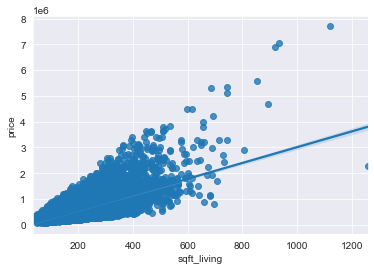

In [100]:
# scatter plot
sns.regplot(x = X["sqft_living"], y = y["price"]);

In [101]:
#building model
base_model = sm.OLS(y["price"], sm.add_constant(X["sqft_living"]))
base_results = base_model.fit()
base_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                 1.895e+04
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        12:43:34   Log-Likelihood:            -2.6720e+05
No. Observations:               19219   AIC:                         5.344e+05
Df Residuals:                   19217   BIC:                         5.344e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -5.045e+04   4704.026    -10.726      0.000   -5.97e+04   -4.12e+04
sqft_living  3060.4892     22.231    137.668      0.000    3016.915    3104.064
==============================================================================
Omnibus:                    13335.918   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           507169.818
Skew:                           2.859   Prob(JB):                         0.00
Kurtosis:                      27.508   Cond. No.                         522.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model Diagnostics

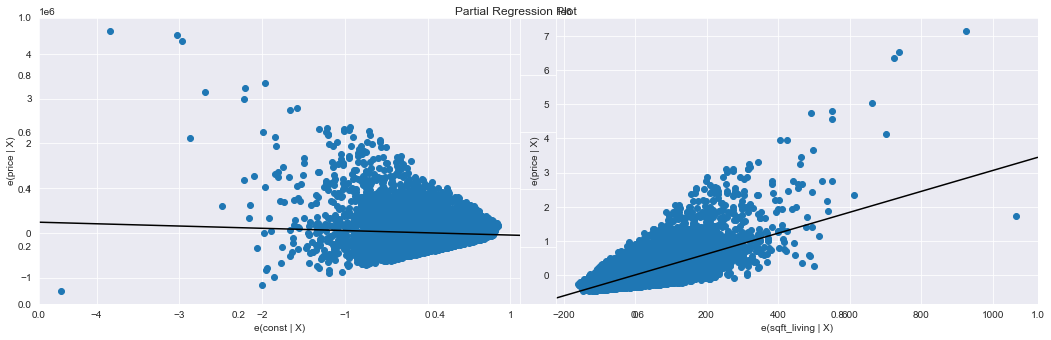

In [102]:
#residuals plot
fig, ax = plt.subplots(figsize = (15, 5))

sm.graphics.plot_partregress_grid(base_results, fig = fig);

In [103]:
# mean absolute error
y_pred = base_results.predict(sm.add_constant(X["sqft_living"]))
mean_absolute_error(y["price"], y_pred)

175088.925784055

This model explains about 50% variance in sales.

The model is statistically significant overall and all the coefficients are statistically significant at an alpha of 0.05.

When the sqft_living increases by 1 meter squared, this is associated with an increase of house price of about $3060.

The constant for this model is a negative which does not make sense.

The mean absolute error for the model is not so bad but the model can do better.

This model is not the best therefore we'll build a multiple regression model.

### Second Model: MULTIPLE REGRESSION MODEL

We will build a multiple regression model so as to improve our baseline model.

In [105]:
#preview of target variable
y.head()

,price
1,538000.0
2,180000.0
3,604000.0
4,510000.0
5,1230000.0


In [106]:
# preview of independent variables
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,waterfront_NO,condition_Fair,condition_Good,condition_Poor,...,grade_10 Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_8 Good,grade_9 Better
1,3,2.25,238.76071,672.803526,2.0,1951,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1.00,71.53531,929.030000,1.0,1933,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,3.00,182.08988,464.515000,1.0,1965,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,2.00,156.07704,750.656240,1.0,1987,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,4,4.50,503.53426,9469.602790,1.0,2001,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [107]:
# building the model
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     1917.
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        12:46:39   Log-Likelihood:            -2.6293e+05
No. Observations:               19219   AIC:                         5.259e+05
Df Residuals:                   19197   BIC:                         5.261e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                7.696e+06   1.36e+05     56.564      0.000    7.43e+06    7.96e+06
bedrooms            -2.894e+04   2143.582    -13.502      0.000   -3.31e+04   -2.47e+04
bathrooms            5.491e+04   3588.033     15.303      0.000    4.79e+04    6.19e+04
sqft_living          1587.1741     37.844     41.940      0.000    1512.997    1661.351
sqft_lot               -3.0852      0.414     -7.459      0.000      -3.896      -2.274
floors               2.958e+04   3603.308      8.208      0.000    2.25e+04    3.66e+04
yr_built            -3496.7203     69.758    -50.126      0.000   -3633.452   -3359.988
waterfront_NO       -7.302e+05   1.78e+04    -40.930      0.000   -7.65e+05   -6.95e+05
condition_Fair      -3.126e+04   1.75e+04     -1.790      0.073   -6.55e+04    2963.916
condition_Good       1.669e+04   3795.275      4.398      0.000    9251.059    2.41e+04
condition_Poor      -2.662e+04   4.27e+04     -0.623      0.533    -1.1e+05    5.72e+04
condition_Very Good  5.902e+04   6118.876      9.646      0.000     4.7e+04     7.1e+04
grade_10 Very Good   4.251e+05   8928.880     47.614      0.000    4.08e+05    4.43e+05
grade_11 Excellent   6.753e+05   1.39e+04     48.556      0.000    6.48e+05    7.03e+05
grade_12 Luxury      1.201e+06    2.6e+04     46.145      0.000    1.15e+06    1.25e+06
grade_13 Mansion     2.361e+06   6.11e+04     38.646      0.000    2.24e+06    2.48e+06
grade_3 Poor        -1.642e+05   2.12e+05     -0.775      0.438   -5.79e+05    2.51e+05
grade_4 Low         -1.162e+05   4.26e+04     -2.727      0.006      -2e+05   -3.27e+04
grade_5 Fair        -1.348e+05   1.51e+04     -8.944      0.000   -1.64e+05   -1.05e+05
grade_6 Low Average -8.303e+04   5861.435    -14.165      0.000   -9.45e+04   -7.15e+04
grade_8 Good         9.377e+04   4192.790     22.364      0.000    8.55e+04    1.02e+05
grade_9 Better       2.418e+05   6235.521     38.782      0.000     2.3e+05    2.54e+05
==============================================================================
Omnibus:                    10924.099   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           371394.582
Skew:                           2.148   Prob(JB):                         0.00
Kurtosis:                      24.103   Cond. No.                     5.71e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.71e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
y_pred = results.predict(sm.add_constant(X))
mean_absolute_error(y, y_pred)

138051.78627277963

This model explains about 67.7% variance in sales.

The model is statistically significant overall at an alpha of 0.05.

The mean absolute error for the model is much better than the baseline model.

This model therefore performs better than our previous model.

### Model Diagnostics

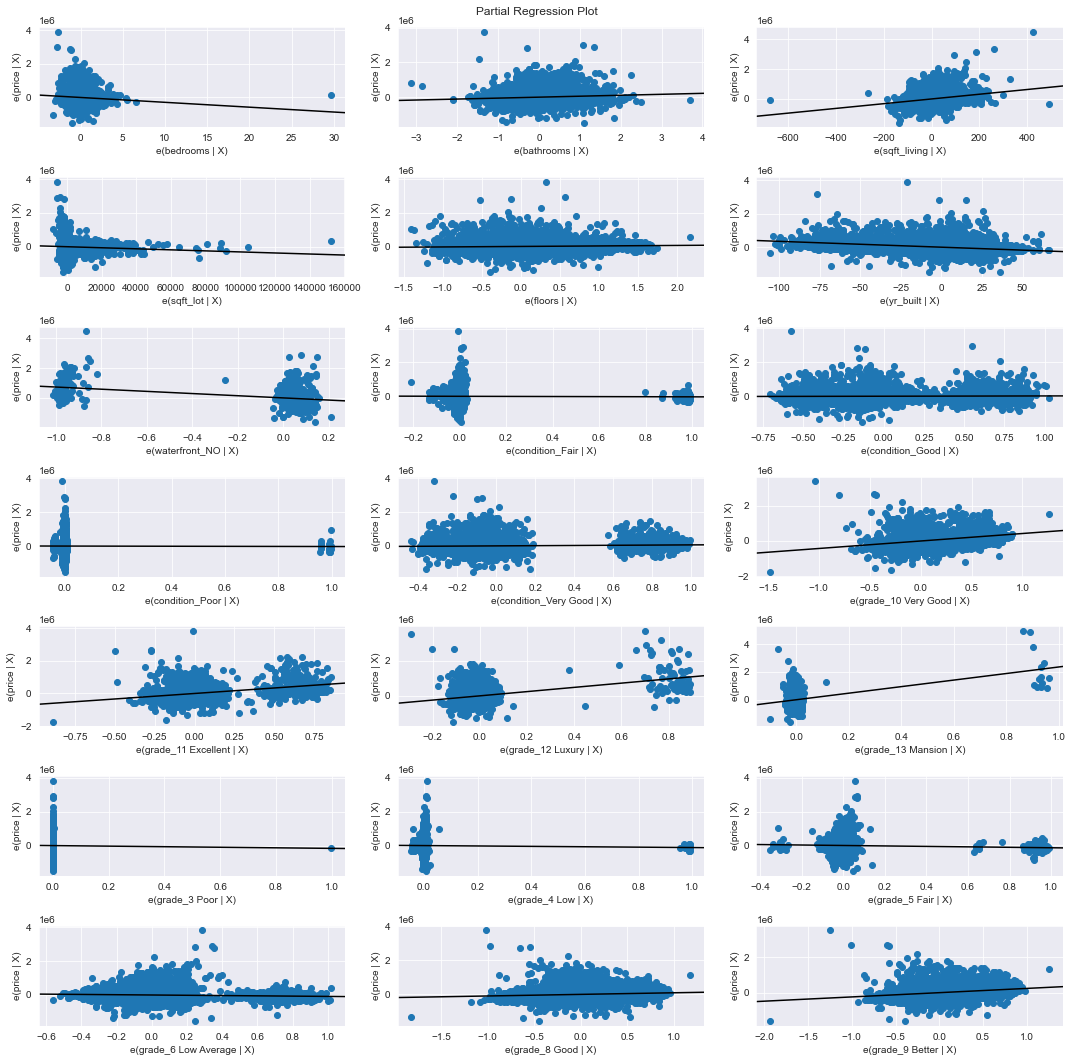

In [108]:
#partial regression plots
fig = plt.figure(figsize=(15,15))
sm.graphics.plot_partregress_grid(
    results,
    exog_idx=list(X.columns),
    grid=(7,3),
    fig=fig)
plt.tight_layout()
plt.show()

### Checking for collinearity

We need to check whether some independent features are correlated with one another. This is very important so as to not misinterpret the results of the model.

<AxesSubplot:>

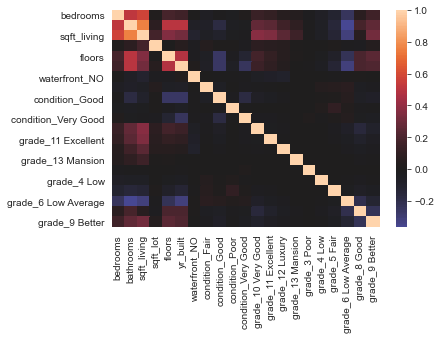

In [109]:
# correlation heatmap
sns.heatmap(X.corr(), center = 0)

In [110]:
#correlation dataframe
X.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,waterfront_NO,condition_Fair,condition_Good,condition_Poor,...,grade_10 Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_8 Good,grade_9 Better
bedrooms,1.000000,0.516220,0.578219,0.029396,0.182445,0.157573,0.002390,-0.049945,-0.011725,-0.031664,...,0.135747,0.116718,0.065575,0.041228,-0.018448,-0.067422,-0.115042,-0.240232,0.073861,0.162930
bathrooms,0.516220,1.000000,0.756350,0.085109,0.506195,0.506996,-0.067288,-0.074640,-0.169034,-0.043474,...,0.273528,0.247602,0.163791,0.100713,-0.012813,-0.056135,-0.138080,-0.366454,0.187691,0.262380
sqft_living,0.578219,0.756350,1.000000,0.173346,0.357198,0.317465,-0.110230,-0.061307,-0.083917,-0.032313,...,0.369522,0.345149,0.244018,0.152301,-0.012216,-0.054251,-0.126332,-0.312613,0.069535,0.315252
sqft_lot,0.029396,0.085109,0.173346,1.000000,-0.007220,0.055909,-0.023141,0.044969,0.013641,0.007703,...,0.079399,0.071213,0.064630,0.008369,-0.000370,0.000975,0.019300,-0.017840,-0.024559,0.046894
floors,0.182445,0.506195,0.357198,-0.007220,1.000000,0.490196,-0.021893,-0.054632,-0.258479,-0.021045,...,0.175528,0.117571,0.056030,0.022472,-0.006610,-0.030400,-0.079718,-0.230838,0.199364,0.242985
yr_built,0.157573,0.506996,0.317465,0.055909,0.490196,1.000000,0.026070,-0.063902,-0.259120,-0.052220,...,0.149004,0.098731,0.046376,0.004940,-0.012529,-0.043033,-0.127913,-0.314893,0.202834,0.215761
waterfront_NO,0.002390,-0.067288,-0.110230,-0.023141,-0.021893,0.026070,1.000000,0.001047,-0.010310,-0.013469,...,-0.054226,-0.072291,-0.086212,0.002276,0.000631,0.003158,-0.013710,0.007694,0.012104,-0.008064
condition_Fair,-0.049945,-0.074640,-0.061307,0.044969,-0.054632,-0.063902,0.001047,1.000000,-0.053361,-0.003222,...,-0.015870,-0.012283,-0.005845,-0.002323,-0.000644,0.045670,0.058058,0.075790,-0.038889,-0.029467
condition_Good,-0.011725,-0.169034,-0.083917,0.013641,-0.258479,-0.259120,-0.010310,-0.053361,1.000000,-0.021569,...,-0.067483,-0.038465,-0.015555,-0.006459,-0.004311,0.011213,0.020597,0.056899,-0.051570,-0.074837
condition_Poor,-0.031664,-0.043474,-0.032313,0.007703,-0.021045,-0.052220,-0.013469,-0.003222,-0.021569,1.000000,...,-0.008535,-0.004965,-0.002362,-0.000939,-0.000260,0.038750,0.106760,0.037789,-0.019373,-0.013369


We will identify those features whose correlation is greater than 0.75. We will use ```stack``` to view only the highly related columns

In [111]:
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row
# reset the index to set the multindex to seperate columns
# sort values.
df = X.corr().abs().stack().reset_index().sort_values(0, ascending=False)

#zip the variable name columns
df['pairs'] = list(zip(df.level_0, df.level_1))

#set index
df.set_index(['pairs'], inplace = True)

#drop the level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)

#rename correlation column as cc
df.columns = ['cc']

#drop the duplicates
df.drop_duplicates(inplace=True)

#display dataframe
df[(df.cc>.75) & (df.cc <1)]

,cc
pairs,
"(bathrooms, sqft_living)",0.75635


The variables ```sqft_living and bathrooms``` are highly correlated.

To avoid this I will drop the ```bathrooms``` column to avoid collinearity.

In [112]:
# dropping bathroom column
X.drop(["bathrooms"], axis = 1, inplace = True)

In [113]:
# confirming bathroom column has been dropped
X.head()

,bedrooms,sqft_living,sqft_lot,floors,yr_built,waterfront_NO,condition_Fair,condition_Good,condition_Poor,condition_Very Good,grade_10 Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_8 Good,grade_9 Better
1,3,238.76071,672.803526,2.0,1951,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,71.53531,929.030000,1.0,1933,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,182.08988,464.515000,1.0,1965,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,3,156.07704,750.656240,1.0,1987,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5,4,503.53426,9469.602790,1.0,2001,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [114]:
#check for collinearity again
df = X.corr().abs().stack().reset_index().sort_values(0, ascending=False)

#zip the variable name columns
df['pairs'] = list(zip(df.level_0, df.level_1))

#set index
df.set_index(['pairs'], inplace = True)

#drop the level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)

#rename correlation column as cc
df.columns = ['cc']

#drop the duplicates
df.drop_duplicates(inplace=True)

#display dataframe
df[(df.cc>.7) & (df.cc <1)]

,cc
pairs,


The collinearity is no longer there.

### Third Model: Multiple Regression Model

We can now build the linear regression model after removing the collinear features.

In [115]:
#building model
model = sm.OLS(y["price"], sm.add_constant(X))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     1978.
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        12:55:51   Log-Likelihood:            -2.6305e+05
No. Observations:               19219   AIC:                         5.261e+05
Df Residuals:                   19198   BIC:                         5.263e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                7.114e+06   1.31e+05     54.129      0.000    6.86e+06    7.37e+06
bedrooms            -2.321e+04   2123.423    -10.932      0.000   -2.74e+04   -1.91e+04
sqft_living          1843.6751     34.135     54.011      0.000    1776.767    1910.583
sqft_lot               -3.3182      0.416     -7.979      0.000      -4.133      -2.503
floors               4.232e+04   3526.996     11.998      0.000    3.54e+04    4.92e+04
yr_built            -3184.9611     67.121    -47.451      0.000   -3316.524   -3053.398
waterfront_NO       -7.351e+05   1.79e+04    -40.959      0.000    -7.7e+05      -7e+05
condition_Fair      -3.316e+04   1.76e+04     -1.888      0.059   -6.76e+04    1268.242
condition_Good       1.581e+04   3817.817      4.141      0.000    8326.791    2.33e+04
condition_Poor      -2.949e+04    4.3e+04     -0.686      0.493   -1.14e+05    5.48e+04
condition_Very Good  6.649e+04   6136.310     10.836      0.000    5.45e+04    7.85e+04
grade_10 Very Good    4.27e+05   8982.132     47.536      0.000    4.09e+05    4.45e+05
grade_11 Excellent   6.806e+05    1.4e+04     48.664      0.000    6.53e+05    7.08e+05
grade_12 Luxury      1.208e+06   2.62e+04     46.165      0.000    1.16e+06    1.26e+06
grade_13 Mansion     2.381e+06   6.14e+04     38.757      0.000    2.26e+06     2.5e+06
grade_3 Poor        -1.724e+05   2.13e+05     -0.809      0.418    -5.9e+05    2.45e+05
grade_4 Low         -1.202e+05   4.29e+04     -2.803      0.005   -2.04e+05   -3.62e+04
grade_5 Fair        -1.407e+05   1.52e+04     -9.281      0.000    -1.7e+05   -1.11e+05
grade_6 Low Average -9.116e+04   5872.656    -15.522      0.000   -1.03e+05   -7.96e+04
grade_8 Good         9.922e+04   4202.943     23.606      0.000     9.1e+04    1.07e+05
grade_9 Better        2.42e+05   6273.261     38.583      0.000     2.3e+05    2.54e+05
==============================================================================
Omnibus:                    10891.953   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           359062.545
Skew:                           2.149   Prob(JB):                         0.00
Kurtosis:                      23.734   Cond. No.                     5.71e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.71e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [116]:
# mean absolute error for the model
y_pred = results.predict(sm.add_constant(X))
mean_absolute_error(y["price"], y_pred)

138891.69064275504

Removing the collinearity doesn't do much to our model in terms of performance but it is still important to remove the highly correlated independent variables to avoid wrong interpretation of the model.

Based on the results, this model definitely performs better than the baseline model.

The model explains about 67.3% in variance of the price of houses. The model is also statistically significant overall at an alpha of 0.05.

All the coefficents of the model are statistically significant at an alpha of 0.05 except ```condition_Fair```, ```condition_Poor``` and ```grade_3 Poor```.

The following is what we get from the model;

* When all the other predictors are 0, the sale price of a house will be about 7.1 million dollars.
* For each increase of 1 in the number of bedrooms, we see an associated decrease in the sale price of the house of about $23,210.
* When the area of the living room increases by 1 square meter, we see an associated increase of sale price of the house of about $1843.7.
* When the area of the lot increases by 1 square meter, we see an associated decrease of of the price of the house of about $3.3
* When the year increases by one since when the house was built, we see an associated decrease of the price of the house of about $3185.
* When the house is not on a waterfront compared to a house on a waterfront, we see an associated decrease in price of the house of about $735,100.
* When the condition of a house is fair, compared to a house whose condition is average, we see an associated decrease in price of about $33,160.
* When the condition of a house is good, compared to a house whose condition is average, we see an associated increase in price of about $15,810.
* When the condition of a house is poor, compared to a house whose condition is average, we see an associated decrease in the price of about $29,490.
* When the condition of a house is very good, compared to a house whose condition is average, we see an associated increase in price of about $66,490.
* When the grade of a house is a 10, compared to a house whose grade is a 7, we see an ssociated increase in price of about $427,000.
* When the grade of a house is 11 compared to a house whose grade is a 7, we see an associated increase in price of about $680,600.
* When the grade of a house is a 12, compared to a house whose grade is a 7, we see an associated increase in price of about 1.2 million dollars.
* When the grade of a house is a 13, compared to a house whose grade is a 7, we see an associated increase in price of about 2.3 million dollars.
* When the grade of a house is a 3, compared to a house whose grade is a 7, we see an associated decrease in price of about $172,400.
* When the grade of a house is a 4, compared to a house whose grade is a 7, we see an associated decrease in price of about $120,200.
* When the grade of a house is a 5, compared to a house whose grade is a 7, we see an associated decrease in price of about $140,700.
* When the grade of a house is a 6, compared to a house whose grade is a 7, we see an associated decrease in price of about $91,160.
* When the grade of a house is an 8, compared to a house whose grade is a 7, we see an associated increase in price of about $99,220.
* When the grade of a house is a 9, compared to a house whose grade is a 7, we see an associated increase in price of about $242,000.

### Model diagnostics

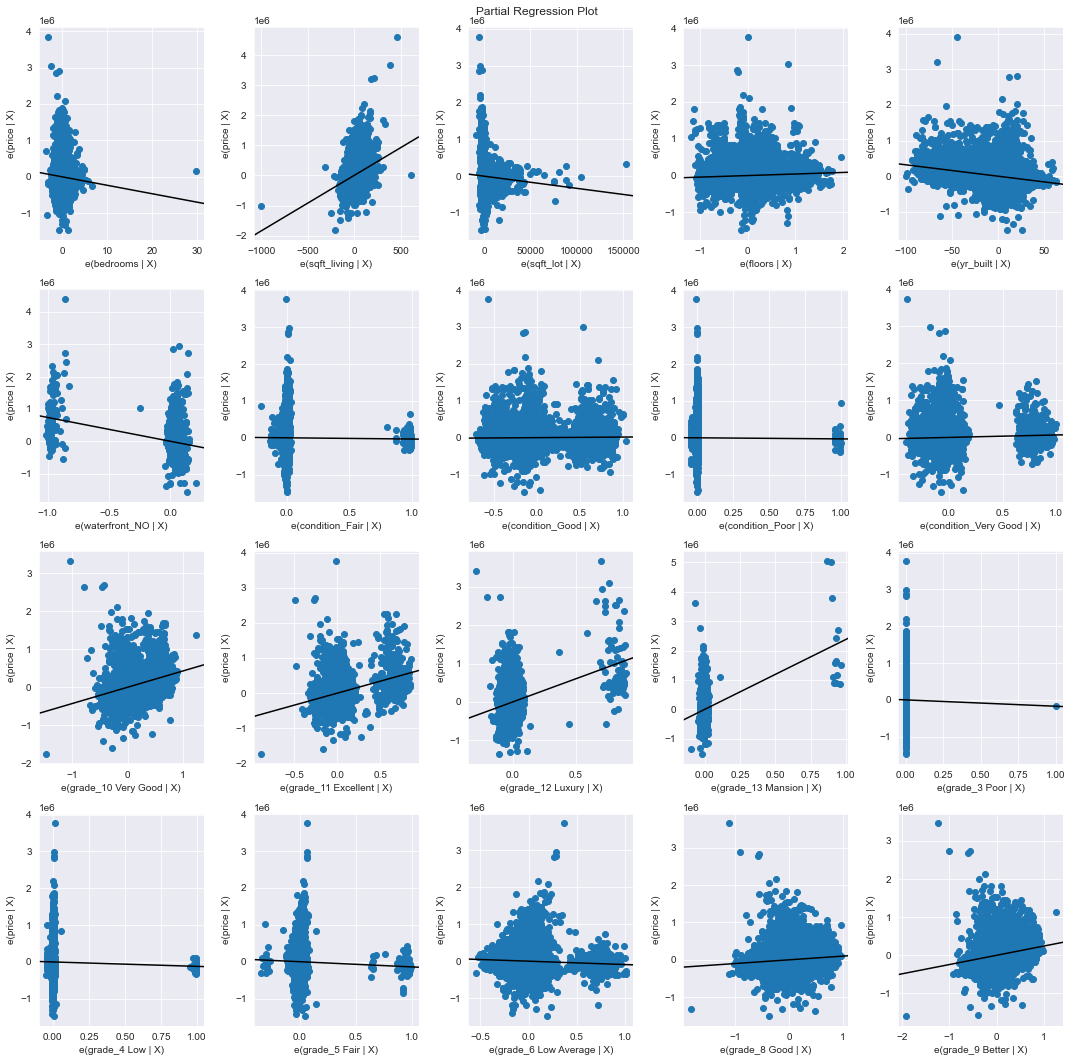

In [118]:
#partial regression plots for the model
fig = plt.figure(figsize=(15,15))
sm.graphics.plot_partregress_grid(
    results,
    exog_idx=list(X.columns),
    grid=(4,5),
    fig=fig)
plt.tight_layout()
plt.show()

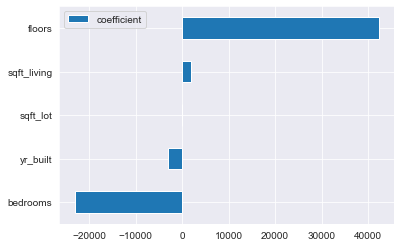

In [119]:
# examining bedrooms, sqft_living, sqft_lot, floors and yr_built
results_df = pd.concat([results.params, results.pvalues], axis=1)
results_df.columns = ["coefficient", "p-value"]
results_df = results_df[results_df["p-value"] < 0.05].sort_values(by="coefficient")
results_df2 = results_df.drop(['const', 'waterfront_NO', 'condition_Good',
       'condition_Very Good', 'grade_10 Very Good', 'grade_11 Excellent',
       'grade_12 Luxury', 'grade_13 Mansion', 'grade_4 Low',
       'grade_5 Fair', 'grade_6 Low Average', 'grade_8 Good',
       'grade_9 Better'])
results_df2.plot.barh(y = "coefficient");

According to the above bar plot, it seems like the number of floors in a house has the highest effect on price. This doesn't seem right because earlier on we saw that the square feet for a house has the highest effect on price.

Floors in a house seem to have the highest effect on price because the features in the model are measured in different units. In order to know the features with the highest effect on price, we will need to standardize all the features so as to know the most effective feature.

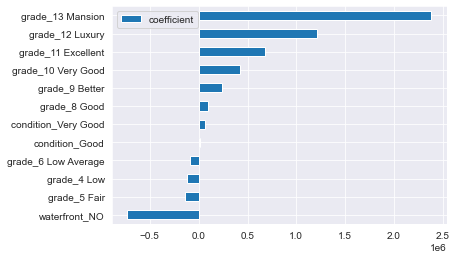

In [121]:
# examining grade and condition of the house
results_df3 = results_df.drop(["const", "bedrooms", "sqft_living", "sqft_lot", "floors", "yr_built"])
results_df3.plot.barh(y = "coefficient");

### Fourth Model: Checking the most important fetures for a house

Since all features are not measured using the same units, it is not easy to find the most important features of the house. I'll standardize all the features so as to find the feature that has the highest effect on price.

In [123]:
#standardizing features
X_standardized = X.copy()
for col in X_standardized:
    X_standardized[col] = (X_standardized[col] - X_standardized[col].mean()) \
                            / X_standardized[col].std()

#Building standardized model
standardized_model = sm.OLS(y, sm.add_constant(X_standardized))
standardized_results = standardized_model.fit()
standardized_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     1978.
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        13:06:27   Log-Likelihood:            -2.6305e+05
No. Observations:               19219   AIC:                         5.261e+05
Df Residuals:                   19198   BIC:                         5.263e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5.416e+05   1535.811    352.672      0.000    5.39e+05    5.45e+05
bedrooms            -2.156e+04   1971.768    -10.932      0.000   -2.54e+04   -1.77e+04
sqft_living           1.58e+05   2925.767     54.011      0.000    1.52e+05    1.64e+05
sqft_lot            -1.258e+04   1577.007     -7.979      0.000   -1.57e+04   -9492.456
floors               2.286e+04   1905.138     11.998      0.000    1.91e+04    2.66e+04
yr_built            -9.359e+04   1972.297    -47.451      0.000   -9.75e+04   -8.97e+04
waterfront_NO       -6.383e+04   1558.259    -40.959      0.000   -6.69e+04   -6.08e+04
condition_Fair      -2937.2008   1555.820     -1.888      0.059   -5986.745     112.343
condition_Good       6962.2565   1681.249      4.141      0.000    3666.862    1.03e+04
condition_Poor      -1063.0677   1549.930     -0.686      0.493   -4101.066    1974.930
condition_Very Good   1.79e+04   1652.100     10.836      0.000    1.47e+04    2.11e+04
grade_10 Very Good   9.563e+04   2011.785     47.536      0.000    9.17e+04    9.96e+04
grade_11 Excellent    9.19e+04   1888.523     48.664      0.000    8.82e+04    9.56e+04
grade_12 Luxury      7.874e+04   1705.713     46.165      0.000    7.54e+04    8.21e+04
grade_13 Mansion     6.192e+04   1597.541     38.757      0.000    5.88e+04     6.5e+04
grade_3 Poor        -1243.3079   1536.757     -0.809      0.418   -4255.485    1768.870
grade_4 Low         -4332.6633   1545.527     -2.803      0.005   -7362.031   -1303.296
grade_5 Fair         -1.47e+04   1583.638     -9.281      0.000   -1.78e+04   -1.16e+04
grade_6 Low Average -2.663e+04   1715.305    -15.522      0.000      -3e+04   -2.33e+04
grade_8 Good         4.462e+04   1890.013     23.606      0.000    4.09e+04    4.83e+04
grade_9 Better       7.884e+04   2043.467     38.583      0.000    7.48e+04    8.28e+04
==============================================================================
Omnibus:                    10891.953   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           359062.545
Skew:                           2.149   Prob(JB):                         0.00
Kurtosis:                      23.734   Cond. No.                         4.30
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model Diagnostics

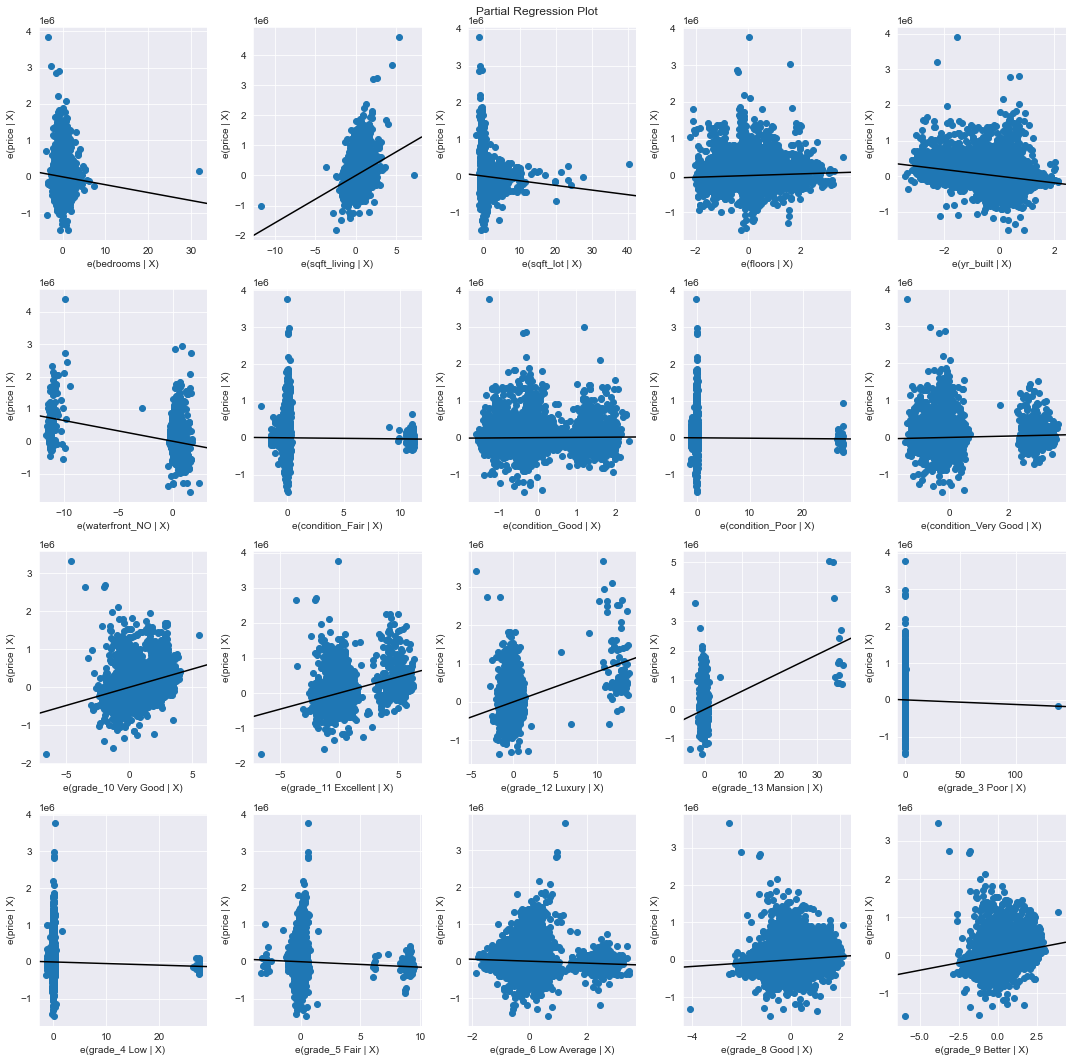

In [124]:
#Partial regression plots for standardized model
fig = plt.figure(figsize=(15,15))
sm.graphics.plot_partregress_grid(
    standardized_results,
    exog_idx=list(X_standardized.columns),
    grid=(4,5),
    fig=fig)
plt.tight_layout()
plt.show()

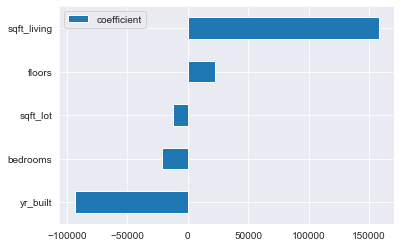

In [125]:
# examining bedrooms, sqft_living, sqft_lot, floors and yr_built
results_df = pd.concat([standardized_results.params, standardized_results.pvalues], axis=1)
results_df.columns = ["coefficient", "p-value"]
results_df = results_df[results_df["p-value"] < 0.05].sort_values(by="coefficient")
results_df2 = results_df.drop(['const', 'waterfront_NO', 'condition_Good',
       'condition_Very Good', 'grade_10 Very Good', 'grade_11 Excellent',
       'grade_12 Luxury', 'grade_13 Mansion', 'grade_4 Low',
       'grade_5 Fair', 'grade_6 Low Average', 'grade_8 Good',
       'grade_9 Better'])
results_df2.plot.barh(y = "coefficient");

After standardizing the model, we can now see that the square feet for a living room has the highest positive effect on price followed by the number of floors in a house.

The year that a house was built has the highest negative effect on price meaning that as the house gets older, the price of the house also decreases.

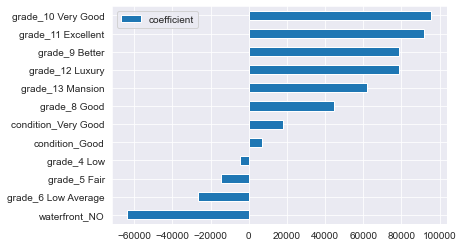

In [126]:
# examining grade and condition of the house
results_df3 = results_df.drop(["const", "bedrooms", "sqft_living", "sqft_lot", "floors", "yr_built"])
results_df3.plot.barh(y = "coefficient");

The above bar plot shows how the grades and conditions of a house have an effect on price of a house.

In terms of condition, a house whose condition is Very Good has the highest positive effect on price and a house with a good condition has the lowest positive effect on price.

In terms of grade, a grade 11 house has the highest positive effect on price and a grade 8 house has the lowest positive effect on price. Houses of grade 4, 5 and 6 decrease the price of the house.

Also, houses that have no waterfront compared to those with a waterfront reduce the price of a house, therefore, houses on a waterfront have a higher price than those that are not on a waterfront.

## RECOMMENDATIONS

Based on the above analysis, the following are the recommendations that might help to increase the selling price of your house;

* Increase the Square footage of living space.
* Ensure that the grade of your home is a grade 10(Very Good) and above.
* Ensure the condition for your home is very good.
* Having your home on a waterfront is an added advantage.